In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [42]:
salary_train = pd.read_csv('SalaryData_Train.csv')
salary_test = pd.read_csv('SalaryData_Test.csv')

In [43]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
salary_train.shape

(30161, 14)

In [45]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [46]:
salary_test.shape

(15060, 14)

In [47]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [48]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [49]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [50]:
salary_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [51]:
# merging the datasets
raw_data = salary_train.append(salary_test)
raw_data.reset_index(inplace=True)
raw_data

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# EDA

In [52]:
raw_data.shape

(45221, 15)

In [53]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          45221 non-null  int64 
 1   age            45221 non-null  int64 
 2   workclass      45221 non-null  object
 3   education      45221 non-null  object
 4   educationno    45221 non-null  int64 
 5   maritalstatus  45221 non-null  object
 6   occupation     45221 non-null  object
 7   relationship   45221 non-null  object
 8   race           45221 non-null  object
 9   sex            45221 non-null  object
 10  capitalgain    45221 non-null  int64 
 11  capitalloss    45221 non-null  int64 
 12  hoursperweek   45221 non-null  int64 
 13  native         45221 non-null  object
 14  Salary         45221 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [54]:
raw_data.describe()

,index,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,12565.448575,38.548086,10.118463,1101.454700,88.548617,40.938038
std,8337.871072,13.217981,2.552909,7506.511295,404.838249,12.007640
min,0.000000,17.000000,1.000000,0.000000,0.000000,1.000000
25%,5652.000000,28.000000,9.000000,0.000000,0.000000,40.000000
50%,11305.000000,37.000000,10.000000,0.000000,0.000000,40.000000
75%,18855.000000,47.000000,13.000000,0.000000,0.000000,45.000000
max,30160.000000,90.000000,16.000000,99999.000000,4356.000000,99.000000


## Outlier Detection

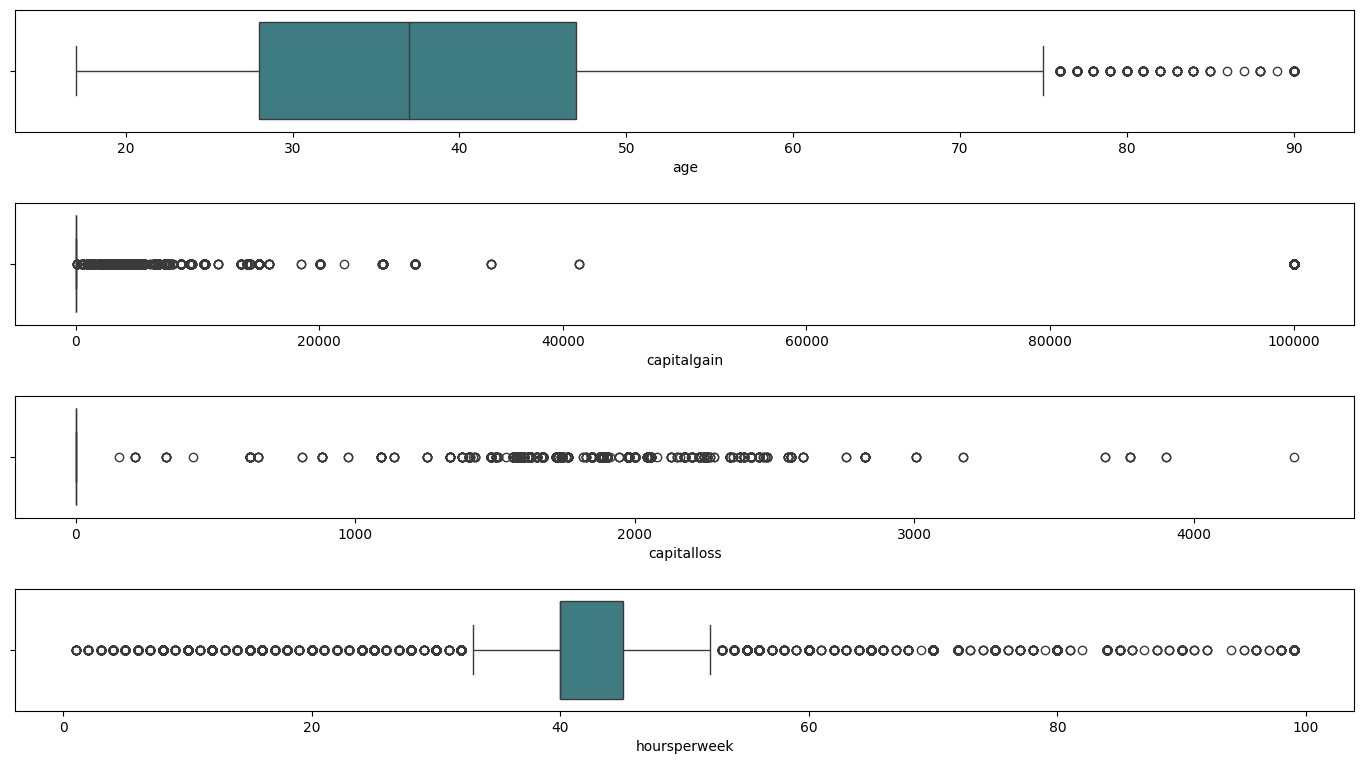

In [55]:
ot=raw_data.copy()
fig, axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [56]:
continuous_features = raw_data.select_dtypes(include=['float64', 'int64'])
continious_features = ['age', 'capitalgain', 'capitalloss', 'hoursperweek']

### After Log transformation

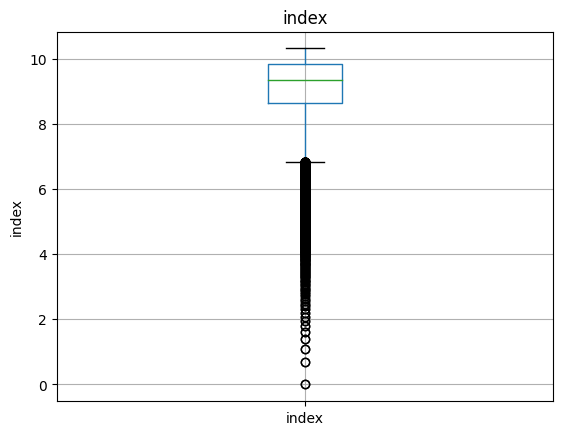

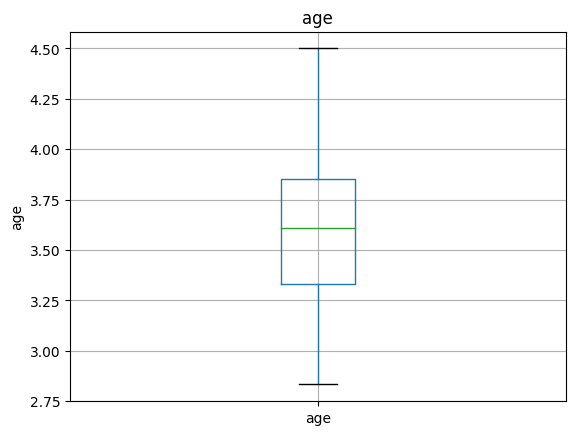

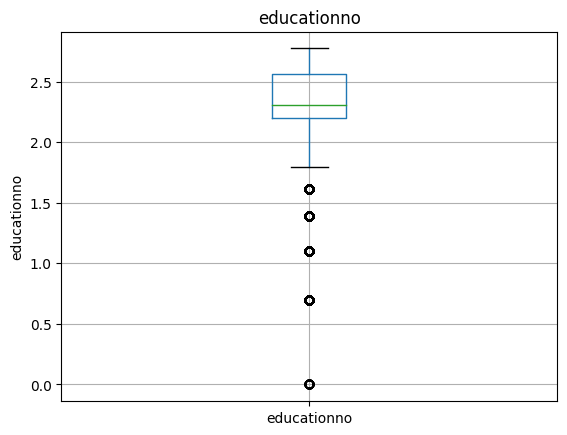

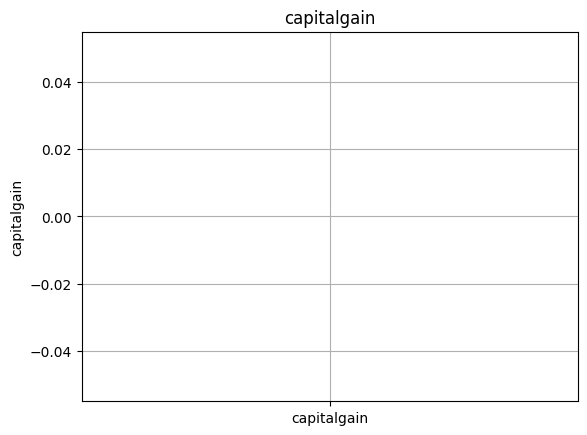

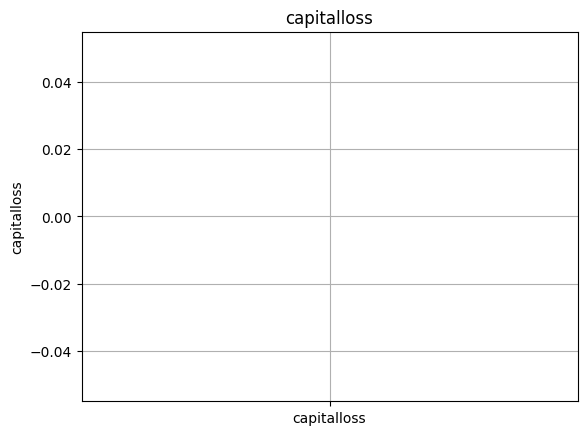

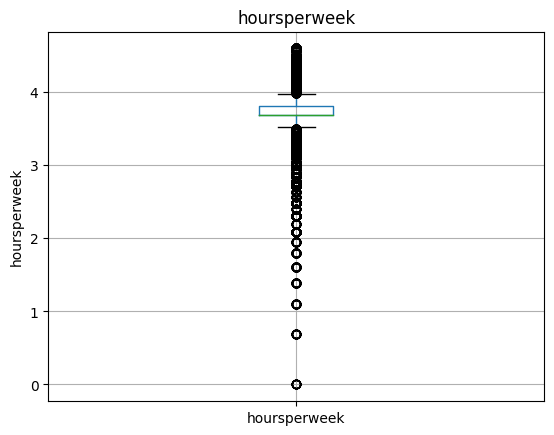

In [57]:
for feature in continuous_features:
    data=raw_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# Data Visualization

### Bar plot for all categorical variables in the dataset

Text(0.5, 1.0, 'Working Class')

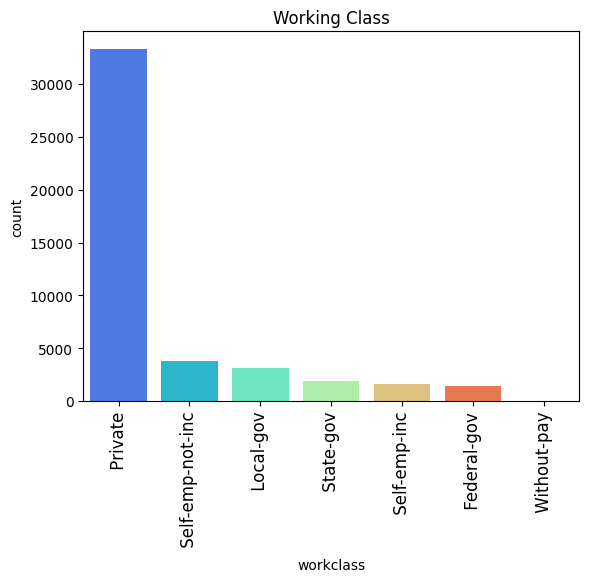

In [58]:
pal = sns.color_palette('rainbow')
sns.countplot(x='workclass', data=raw_data, palette = pal,
              order=raw_data['workclass'].value_counts().index, );
plt.xticks(rotation = 90,fontsize = 12)
plt.title('Working Class')

Text(0.5, 1.0, 'Education')

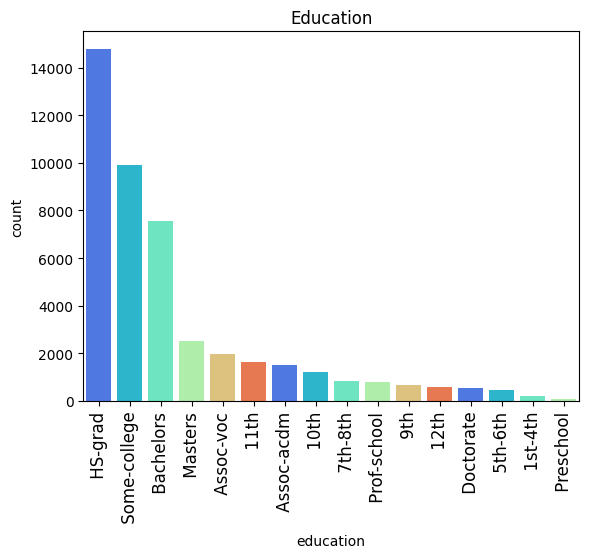

In [59]:
sns.countplot(x='education', data=raw_data, palette = pal,
              order=raw_data['education'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Education')

Text(0.5, 1.0, 'Sex')

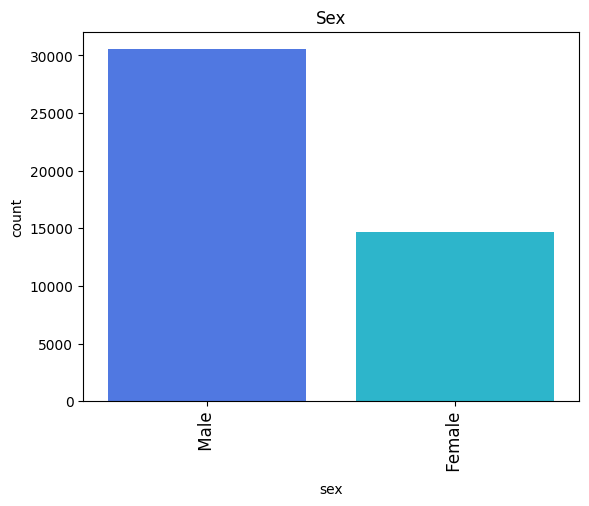

In [60]:
sns.countplot(x='sex', data=raw_data, palette = pal,
              order=raw_data['sex'].value_counts().index)
plt.xticks(fontsize = 12,rotation=90)
plt.title('Sex')

Text(0.5, 1.0, 'Native')

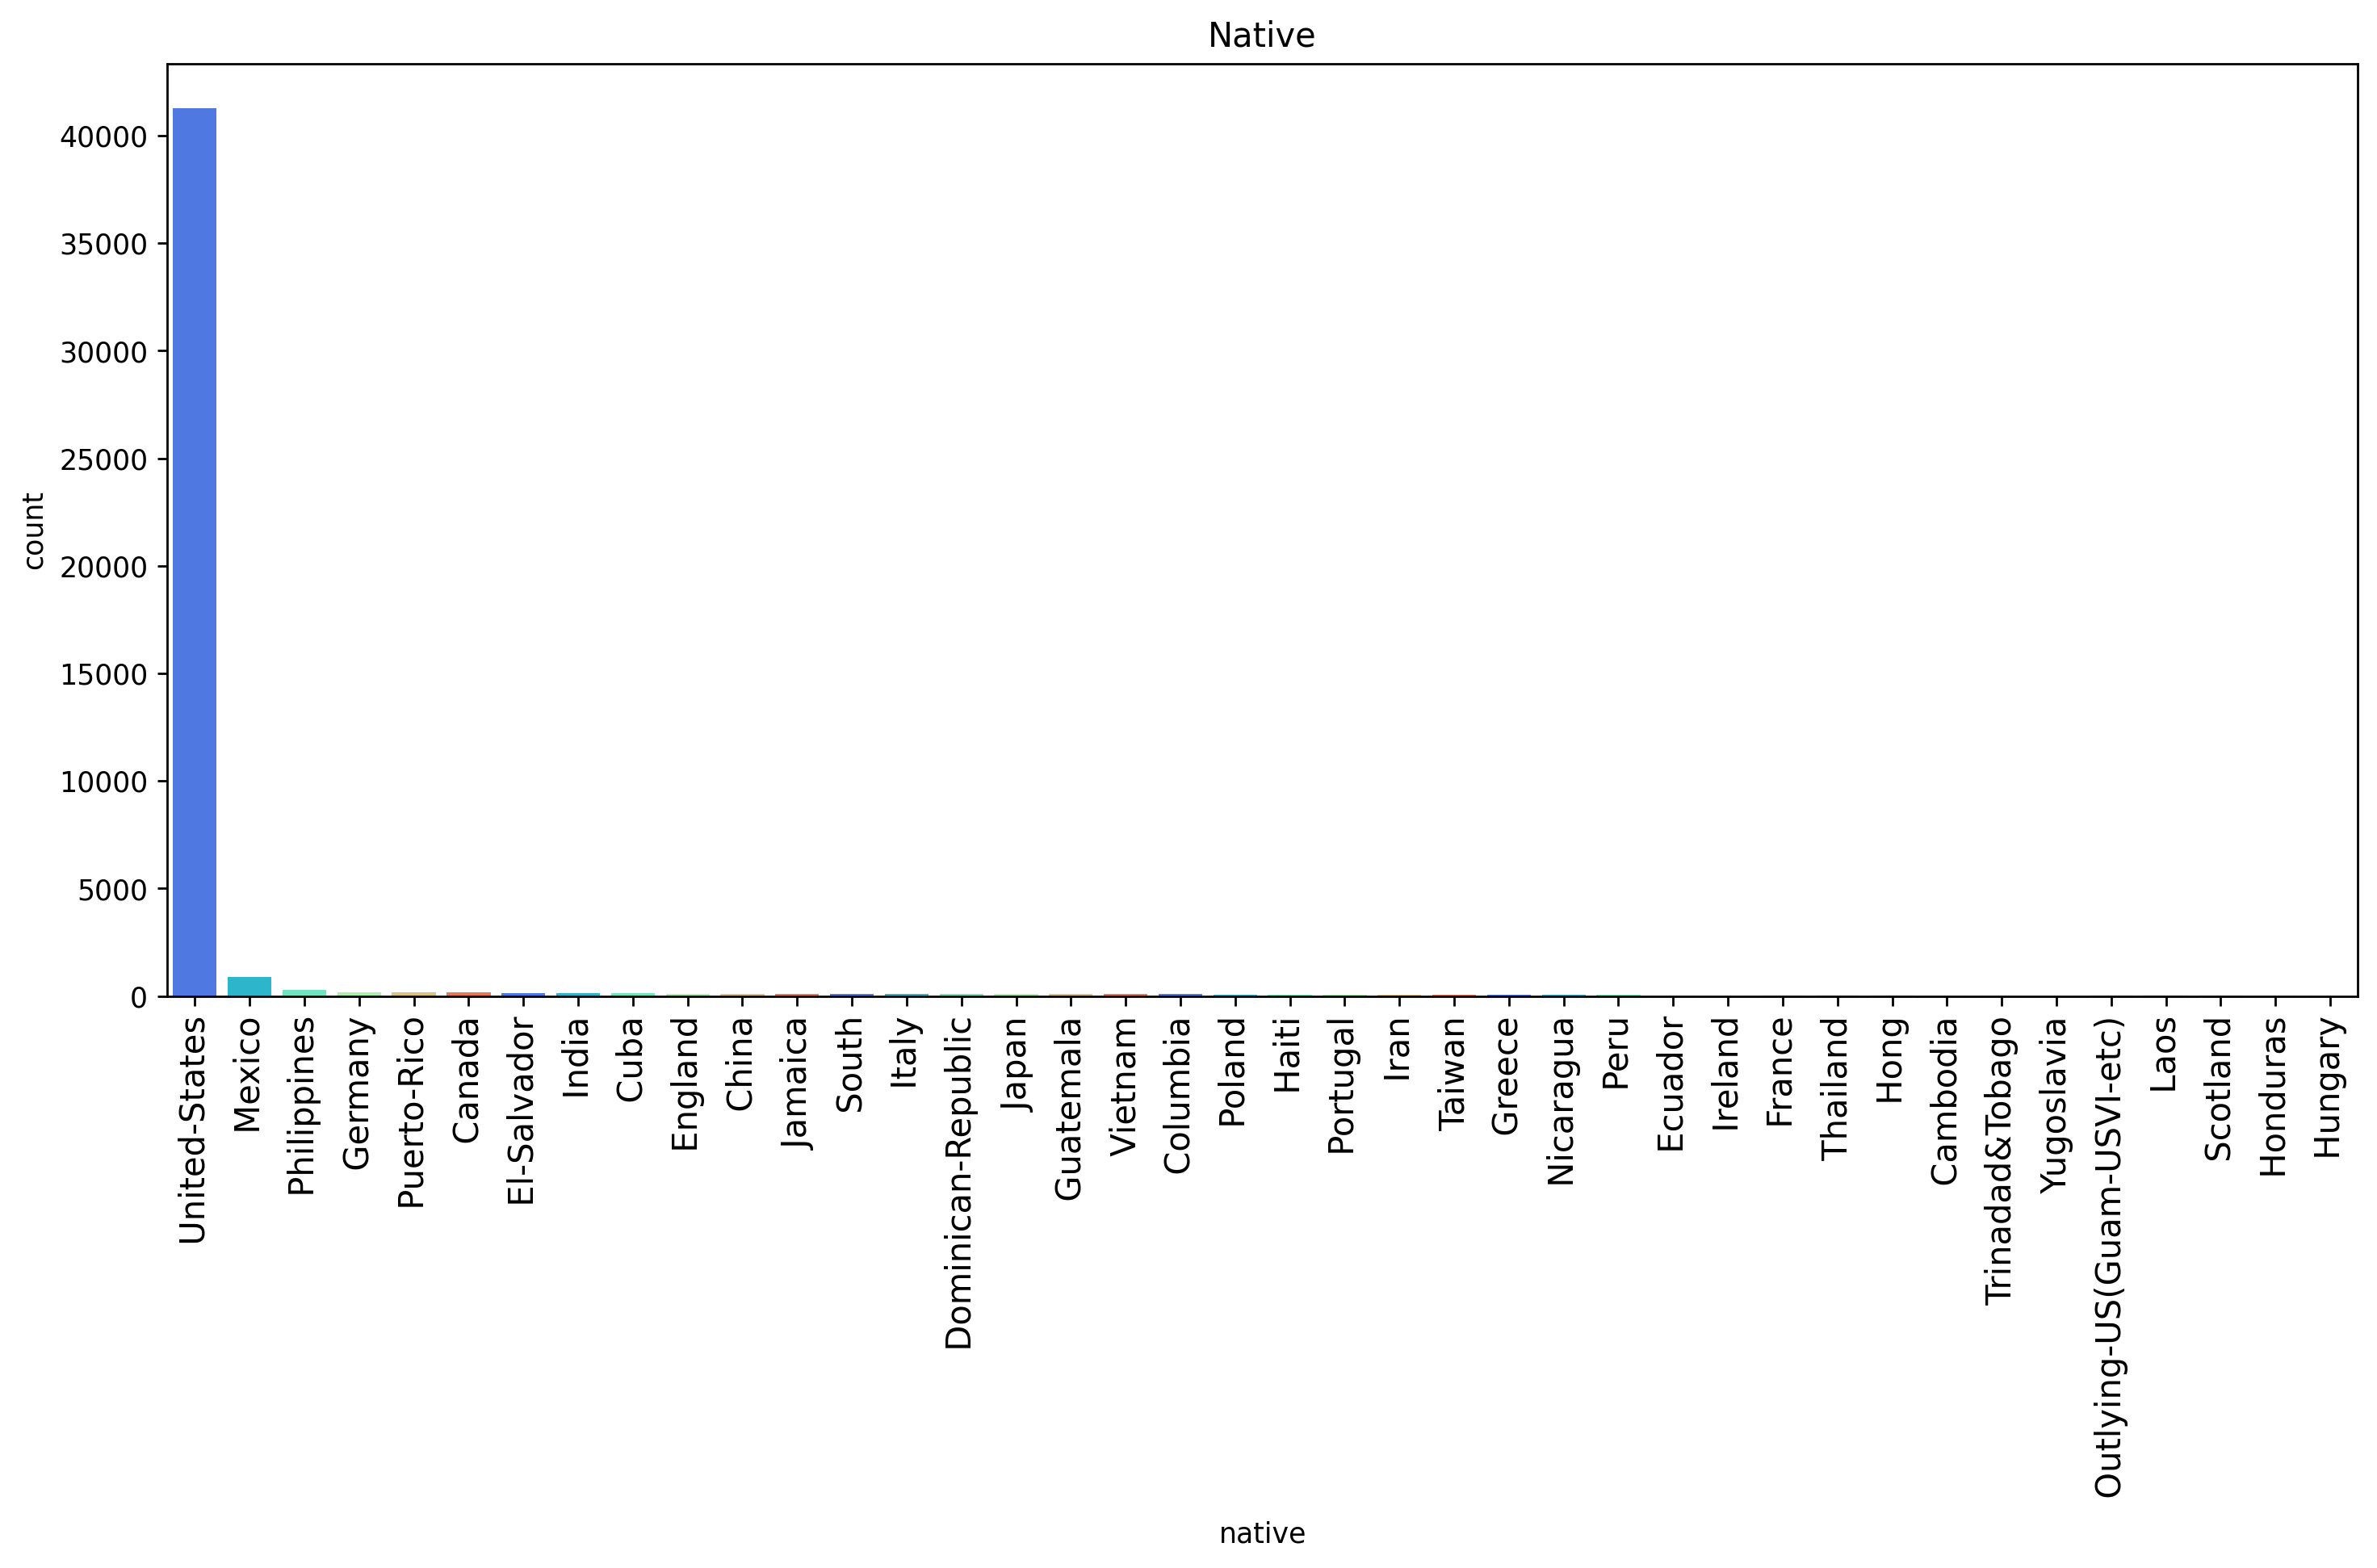

In [61]:
plt.figure(figsize=(14,6),dpi=250)
sns.countplot(x='native', data=raw_data, palette = pal,
              order=raw_data['native'].value_counts().index)
plt.xticks(fontsize = 12,rotation=90)
plt.title('Native')

Text(0.5, 1.0, 'Salary')

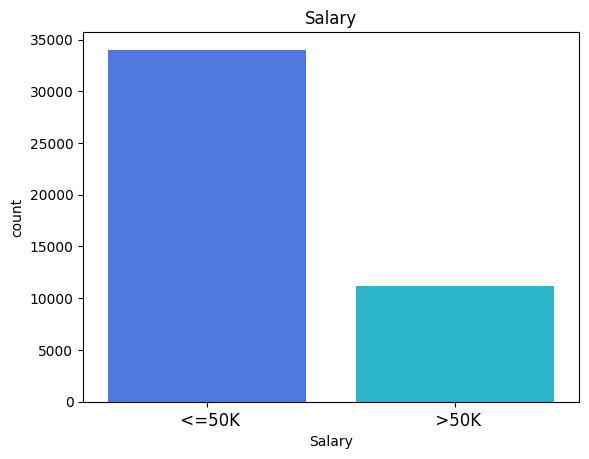

In [62]:
pal = sns.color_palette('rainbow')
sns.countplot(x='Salary', data=raw_data, palette = pal,
              order=raw_data['Salary'].value_counts().index, );
plt.xticks(fontsize = 12)
plt.title('Salary')

# Data Preprocessing

In [63]:
data = raw_data.copy()
data.drop('Salary',axis=1, inplace =True)
data = pd.get_dummies(data.iloc[:,:])
data.head()

,index,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0,39,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,50,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,38,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,53,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,28,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
data['Salary'] = raw_data.Salary
data.head()

,index,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,0,39,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,1,50,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
2,2,38,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,<=50K
3,3,53,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,<=50K
4,4,28,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,<=50K


In [65]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data["Salary"]=LE.fit_transform(data["Salary"])
data.head()

,index,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,0,39,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,50,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,38,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,3,53,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,28,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df = raw_data.copy()

In [67]:
# LabelEncoding the X variables
df["education"]=LE.fit_transform(df["education"])
df["workclass"]=LE.fit_transform(df["workclass"])
df["maritalstatus"]=LE.fit_transform(df["maritalstatus"])
df["sex"]=LE.fit_transform(df["sex"])
df["race"]=LE.fit_transform(df["race"])
df["occupation"]=LE.fit_transform(df["occupation"])
df["relationship"]=LE.fit_transform(df["relationship"])
df["native"]=LE.fit_transform(df["native"])
df['Salary'] = np.where(df['Salary'].str.contains(" >50K"), 1, 0)

df.head(10)

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
5,5,37,2,12,14,2,3,5,4,0,0,0,40,37,0
6,6,49,2,6,5,3,7,1,2,0,0,0,16,21,0
7,7,52,4,11,9,2,3,0,4,1,0,0,45,37,1
8,8,31,2,12,14,4,9,1,4,0,14084,0,50,37,1
9,9,42,2,9,13,2,3,0,4,1,5178,0,40,37,1


In [68]:
X = df.drop('Salary',axis=1)
Y = df['Salary']

# Model Building using BernoulliNB

In [69]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()

In [70]:
# Cross-Validation set approach
training_accuracy = []
test_accuracy = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=i)
    BNB.fit(X_train,Y_train)
    Y_pred_train = BNB.predict(X_train)
    Y_pred_test  = BNB.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train ,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test ,Y_pred_test))

In [71]:
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))

Average training accuracy: 0.727
Average test accuracy: 0.726


In [72]:
# Classification report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80     10192
           1       0.47      0.72      0.56      3375

    accuracy                           0.72     13567
   macro avg       0.68      0.72      0.68     13567
weighted avg       0.78      0.72      0.74     13567



#                

# Model Building using MultinomialNB

In [73]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()

In [74]:
# Cross-Validation set approach
training_accuracy = []
test_accuracy = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=i)
    MNB.fit(X_train,Y_train)
    Y_pred_train = MNB.predict(X_train)
    Y_pred_test  = MNB.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train ,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test ,Y_pred_test))

In [75]:
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))

Average training accuracy: 0.777
Average test accuracy: 0.777


In [76]:
# Classification report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86     10192
           1       0.62      0.24      0.35      3375

    accuracy                           0.78     13567
   macro avg       0.71      0.60      0.61     13567
weighted avg       0.75      0.78      0.74     13567



#                

# Model Building using GaussianNB

In [77]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

In [78]:
# Cross-Validation set approach
training_accuracy = []
test_accuracy = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=i)
    GNB.fit(X_train,Y_train)
    Y_pred_train = GNB.predict(X_train)
    Y_pred_test  = GNB.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train ,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test ,Y_pred_test))

In [79]:
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))

Average training accuracy: 0.794
Average test accuracy: 0.795


In [80]:
# Classification report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     10192
           1       0.69      0.33      0.44      3375

    accuracy                           0.80     13567
   macro avg       0.75      0.64      0.66     13567
weighted avg       0.78      0.80      0.77     13567

